In [1]:
from nmon import *

 /Users/nikolaygusarov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py: 34

nmon [-1.92876299 -0.13192317  1.35584555  3.03995222  3.51547173  6.77787849]


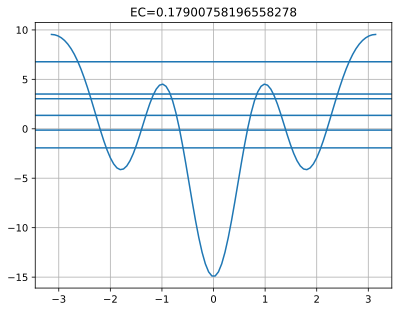

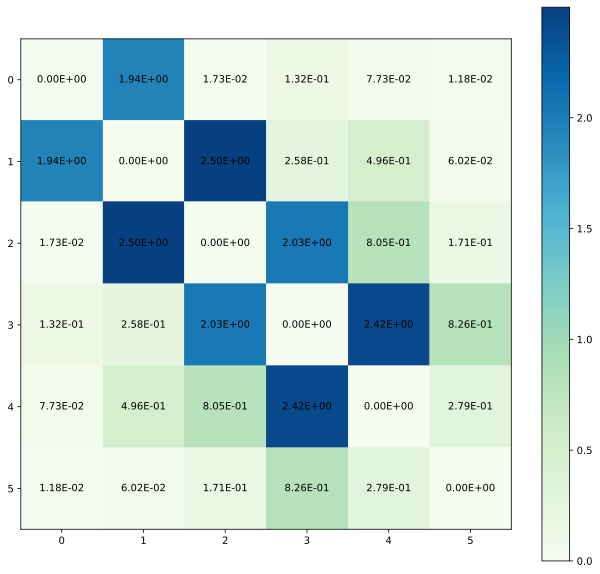

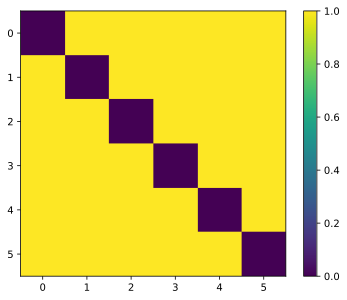

[1.7968398198618825, 1.4877687219921052, 1.6841066723804252, 0.47551950540864407, 3.2624067654883793]

In [2]:
EC_shunt = 0.18

flux = 0.25
EJN = 4.437931
EJM = 5.046207

flux = 0.0
EJN_EC = 15
EJM_EC = 17


nmon = Nmon(N=1, M=4, EJN=EJN_EC*EC_shunt, EJM=EJM_EC*EC_shunt, EC_shunt=EC_shunt)
# nmon = Nmon(N=1, M=4, EJN=EJN, EJM=EJM, EC_shunt=EC_shunt)

ng1 = 0.0
nmon.hamiltonian_calc(flux=flux, ng=[ng1, 1-ng1, 0, 0], num_levels=6, make_plot=True, just_H=False, 
                                cutoff=3) # compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8])

nmon.transition_freqs

In [3]:
# [1.7462478775705748, 1.3564578000674352, 0.13898564845476358, 1.2050753833083228, 0.43318558177840316]

In [4]:
# EC_shunt = 0.18

# EJM_EC = 5
# EJN_EC = 5


# N_ng1 = 20
# N_ng2 = 20
# N_ng3 = 20
# N_ng4 = 20

# ng1_list = np.linspace(0, 1, N_ng1)
# ng2_list = np.linspace(0, 1, N_ng2)
# ng3_list = np.linspace(0, 1, N_ng3)
# ng4_list = np.linspace(0, 1, N_ng4)

# w01_list = np.zeros([N_ng1, N_ng2, N_ng3, N_ng4])

# nmon = Nmon(N=1, M=4, EJM=EJM_EC*EC_shunt, EJN=EJN_EC*EC_shunt, EC_shunt=EC_shunt)

# for i, ng1 in enumerate(tqdm(ng1_list)):
#     for j, ng2 in enumerate(ng2_list):
#         for k, ng3 in enumerate(ng3_list):
#             for l, ng4 in enumerate(ng4_list):
#                 for attempt in range(10):
#                     # try:
#                     nmon.hamiltonian_calc(flux=0, ng=[ng1, ng2, ng3, ng4], make_plot=False, num_levels=10, cutoff=2)
#                     w01_list[i, j, k, l] = nmon.transition_freqs[0]
#                     # except Exception:
#                     #     continue
#                     # if w01_list[i, j, k, l] != 0:
#                     #     break



In [5]:
# np.save("./data_arrays_ng/N={}_M={}_EC_shunt={}_w01_list.npy".format(nmon.N, nmon.M, round(nmon.EC_total,2 )), w01_list)

In [6]:
# w01_list_ng1234 = np.load("./data_arrays_ng/N={}_M={}_EC_shunt={}_w01_list.npy".format(nmon.N, nmon.M, round(nmon.EC_total,2 )))

In [7]:
N_ng = 101
ng_list = np.linspace(0.2, 0.3, N_ng)

N_flux = 1
flux_list = np.linspace(0, 0.5, N_flux)

In [8]:
w01_list = np.full([N_ng, N_flux], None, dtype=float)
w12_list = np.full([N_ng, N_flux], None, dtype=float)
E0_list = np.full([N_ng, N_flux], None, dtype=float)
E1_list = np.full([N_ng, N_flux], None, dtype=float)
E2_list = np.full([N_ng, N_flux], None, dtype=float)
relative_anharm_list = np.full([N_ng, N_flux], None, dtype=float)

for i, ng1 in enumerate(tqdm(ng_list)):
    for k, flux in enumerate(flux_list):
        try:
            nmon.hamiltonian_calc(flux=flux, ng=[ng1, 1-ng1, 0, 0], num_levels=6, make_plot=False, just_H=False, 
                                  cutoff=3)
                                # cutoff=compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8]))
            w01_list[i, k] = nmon.transition_freqs[0]
            E0_list[i, k] = nmon.bound_state_energies[0]
            E1_list[i, k] = nmon.bound_state_energies[1]

            if len(nmon.transition_freqs) > 1:
                w12_list[i, k] = nmon.transition_freqs[1]
                E2_list[i, k] = nmon.bound_state_energies[2]
                relative_anharm_list[i, k] = nmon.relative_anharm

        except Exception as e:
            print(e)
            continue

format_list = (nmon.N, nmon.M, EJN_EC, EJM_EC,round(nmon.EC_shunt, 2))

address_string = "./data_arrays_one_ng_narrow/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_".format(*format_list)

np.save("{}w01_list.npy".format(address_string), w01_list)
np.save("{}w12_list.npy".format(address_string), w12_list)
np.save("{}E0_list.npy".format(address_string), E0_list)
np.save("{}E1_list.npy".format(address_string), E1_list)
np.save("{}E2_list.npy".format(address_string), E2_list)
np.save("{}relative_anharm_list.npy".format(address_string), relative_anharm_list)

100%|██████████| 101/101 [03:37<00:00,  2.16s/it]


In [9]:
format_list = (nmon.N, nmon.M, EJN_EC, EJM_EC,round(nmon.EC_shunt, 2))

address_string = "./data_arrays_one_ng_narrow/N={}_M={}_EJN_EC={}_EJM_EC={}_EC_shunt={}_".format(*format_list)

N_ng = 101
ng_list = np.linspace(0.2, 0.3, N_ng)

N_flux = 1
flux_list = np.linspace(0, 0.5, N_flux)
w01_list = np.load("{}w01_list.npy".format(address_string))
w12_list = np.load("{}w12_list.npy".format(address_string))
E0_list = np.load("{}E0_list.npy".format(address_string))
E1_list = np.load("{}E1_list.npy".format(address_string))
E2_list = np.load("{}E2_list.npy".format(address_string))
relative_anharm_list = np.load("{}relative_anharm_list.npy".format(address_string))


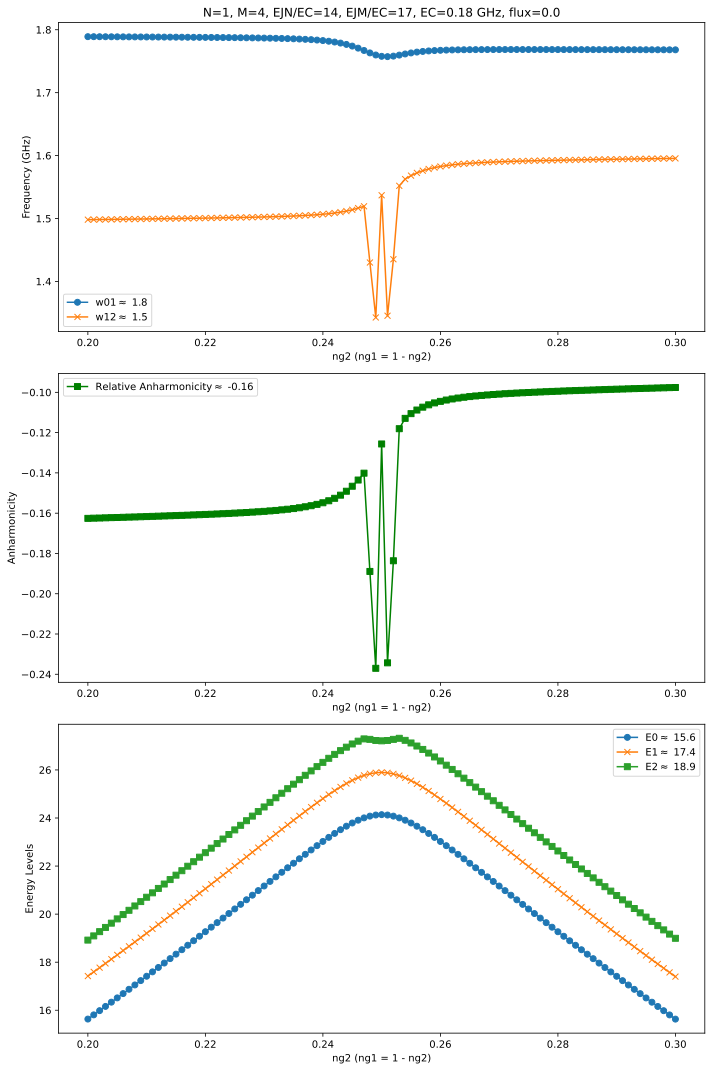

In [10]:
for k, flux_value in enumerate(flux_list):
    # Extract values along the line ng1 + ng2 = 1
    w01_line = w01_list[:, k]
    w12_line = w12_list[:, k]
    anharmonicity_line = relative_anharm_list[:, k]
    E0_line = E0_list[:, k]
    E1_line = E1_list[:, k]
    E2_line = E2_list[:, k]

    # Plotting the data
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    # Canvas 1: w01 and w12
    axes[0].plot(ng_list, w01_line, label=r"w01$\approx$ {}".format(round(w01_line[0], 1)), marker="o")
    axes[0].plot(ng_list, w12_line, label=r"w12$\approx$ {}".format(round(w12_line[0], 1)), marker="x")
    axes[0].set_title("N={}, M={}, EJN/EC={}, EJM/EC={}, EC={} GHz, flux={}".format(nmon.N, nmon.M, int(nmon.EJN/nmon.EC_shunt), int(nmon.EJM/nmon.EC_shunt),
                                                                            round(nmon.EC_shunt, 2), flux_value))
    axes[0].set_xlabel("ng2 (ng1 = 1 - ng2)")
    axes[0].set_ylabel("Frequency (GHz)")
    axes[0].legend()

    # Canvas 2: Anharmonicity
    axes[1].plot(ng_list, anharmonicity_line, label=r"Relative Anharmonicity$\approx$ {}".format(round(anharmonicity_line[0],2)), color="green", marker="s")
    # axes[1].set_title("Anharmonicity along ng1 + ng2 = 1 (flux={})".format(flux_value))
    axes[1].set_xlabel("ng2 (ng1 = 1 - ng2)")
    axes[1].set_ylabel("Anharmonicity")
    axes[1].legend()

    # Canvas 3: E0, E1, and E2
    axes[2].plot(ng_list, E0_line, label=r"E0$\approx$ {}".format(round(E0_line[0],1)), marker="o")
    axes[2].plot(ng_list, E1_line, label=r"E1$\approx$ {}".format(round(E1_line[0],1)), marker="x")
    axes[2].plot(ng_list, E2_line, label=r"E2$\approx$ {}".format(round(E2_line[0],1)), marker="s")
    # axes[2].set_title("E0, E1, E2 along ng1 + ng2 = 1 (flux={})".format(flux_value))
    axes[2].set_xlabel("ng2 (ng1 = 1 - ng2)")
    axes[2].set_ylabel("Energy Levels")
    axes[2].legend()

    # Save the plot for this flux value
    plt.tight_layout()
    plt.savefig("./data_arrays_ng/line_plot_flux_{}.pdf".format(flux_value))
    plt.show()